In [5]:
%matplotlib inline
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams["figure.dpi"] = 100
img_dir = "./images/"

In [6]:
def generate_rang_graph(v=100, e=200):
    G = nx.generators.random_graphs.gnm_random_graph(v, e, directed=False)
    return G

def draw_graph(G):
    #plt.subplot(121)
    #nx.draw(G, with_labels=True, font_weight='bold')
    plt.subplot(111)

    nx.draw_shell(G, with_labels=True, font_weight='bold')
    

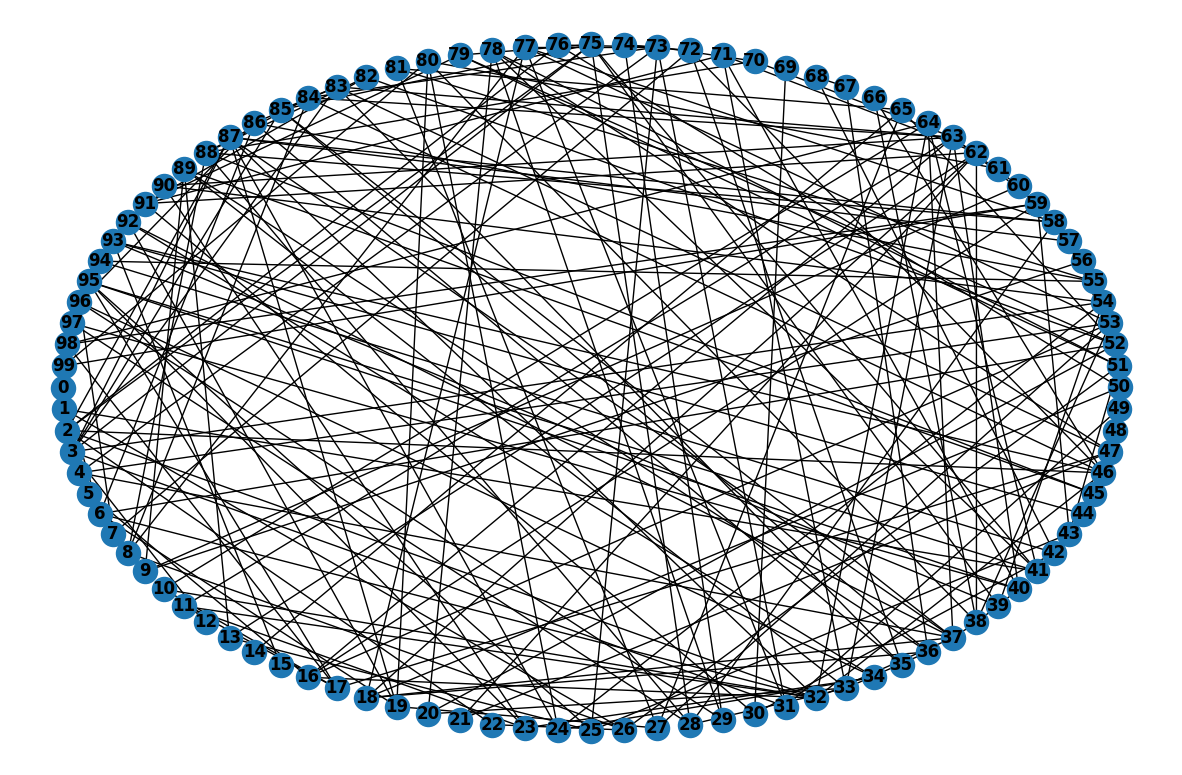

In [7]:
graph = generate_rang_graph()
draw_graph(graph)

# Adjacency Matrix

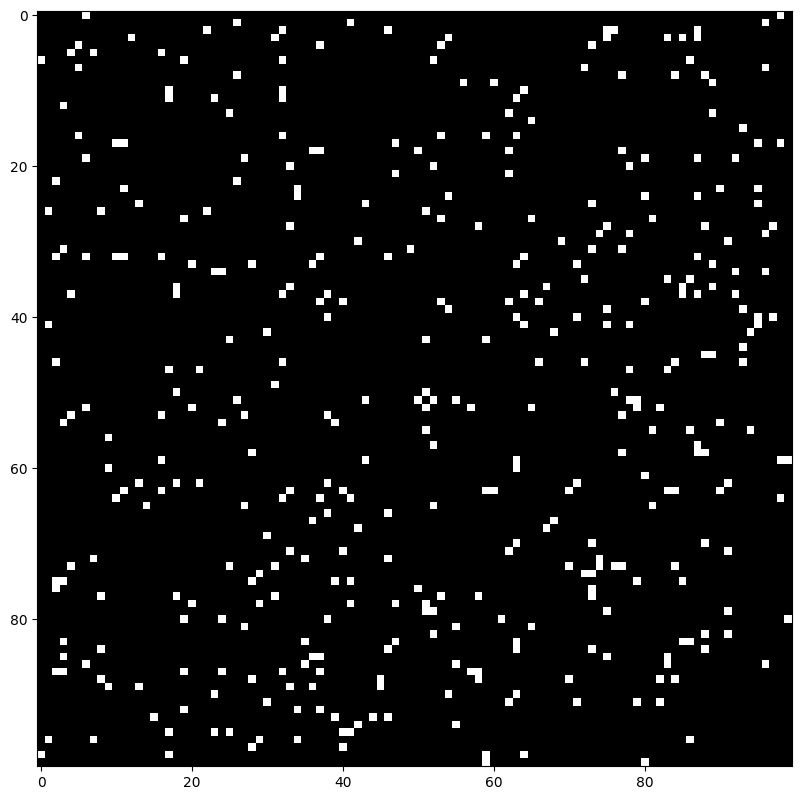

In [8]:
adj_matrix = nx.to_numpy_array(graph)
_ = plt.imshow(adj_matrix, cmap="gray")

# Adjacency list

In [30]:
adj_list = nx.to_dict_of_lists(graph)
n_lines = 0
for key in adj_list.keys():
    if n_lines == 3:
        break
    print(f"{key}: {adj_list[key]}")
    n_lines+=1

0: [6, 98]
1: [96, 26, 41]
2: [76, 32, 46, 75, 87, 22]


# DFS and Connected Components

In [10]:
connected_components = []

not_visited = np.array(graph.nodes)

while len(not_visited) != 0:
    node = not_visited[0]
    not_visited = not_visited[1:]
    dfs_search = list(nx.algorithms.traversal.depth_first_search.dfs_edges(graph, source=node))
    dfs_nodes = list(map( lambda x: x[1], dfs_search))
    conn_comp = [node]
    conn_comp.extend(dfs_nodes)
    conn_comp.sort()
    connected_components.append(conn_comp)
    mask = list(map(lambda x: x not in conn_comp, not_visited))
    not_visited = not_visited[mask]

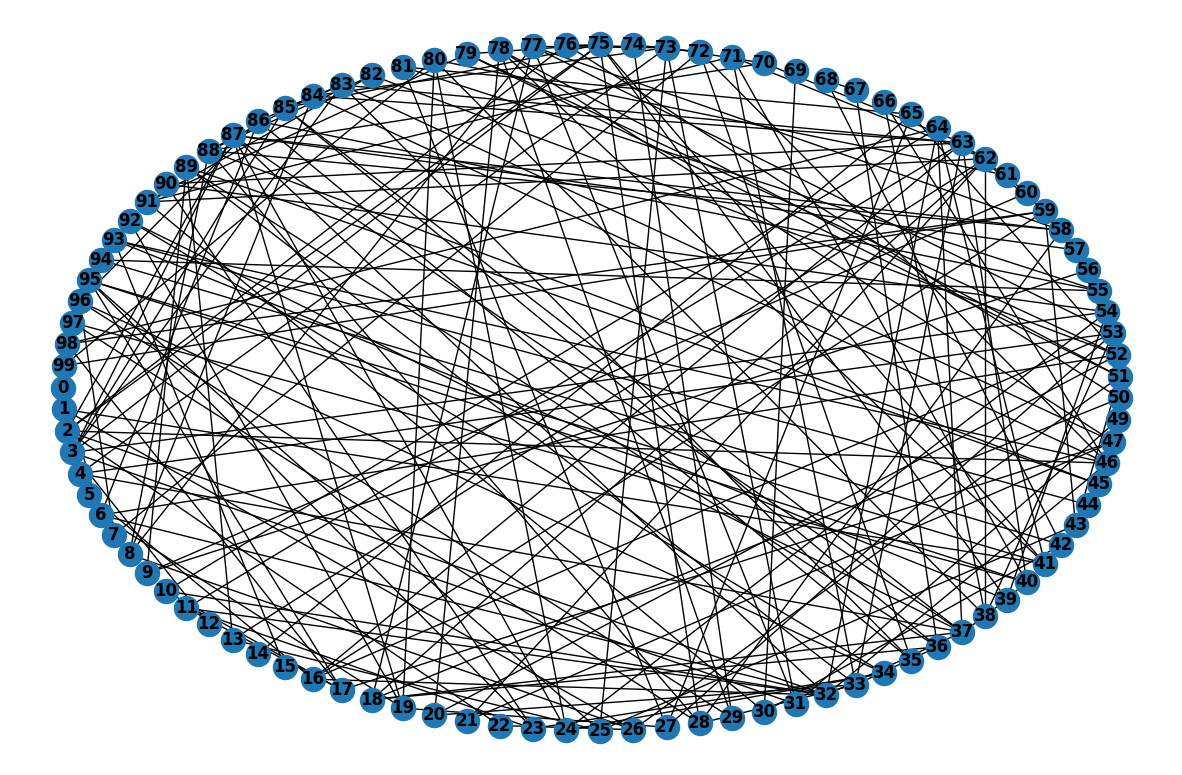

In [11]:
draw_graph(graph.subgraph(connected_components[0]))

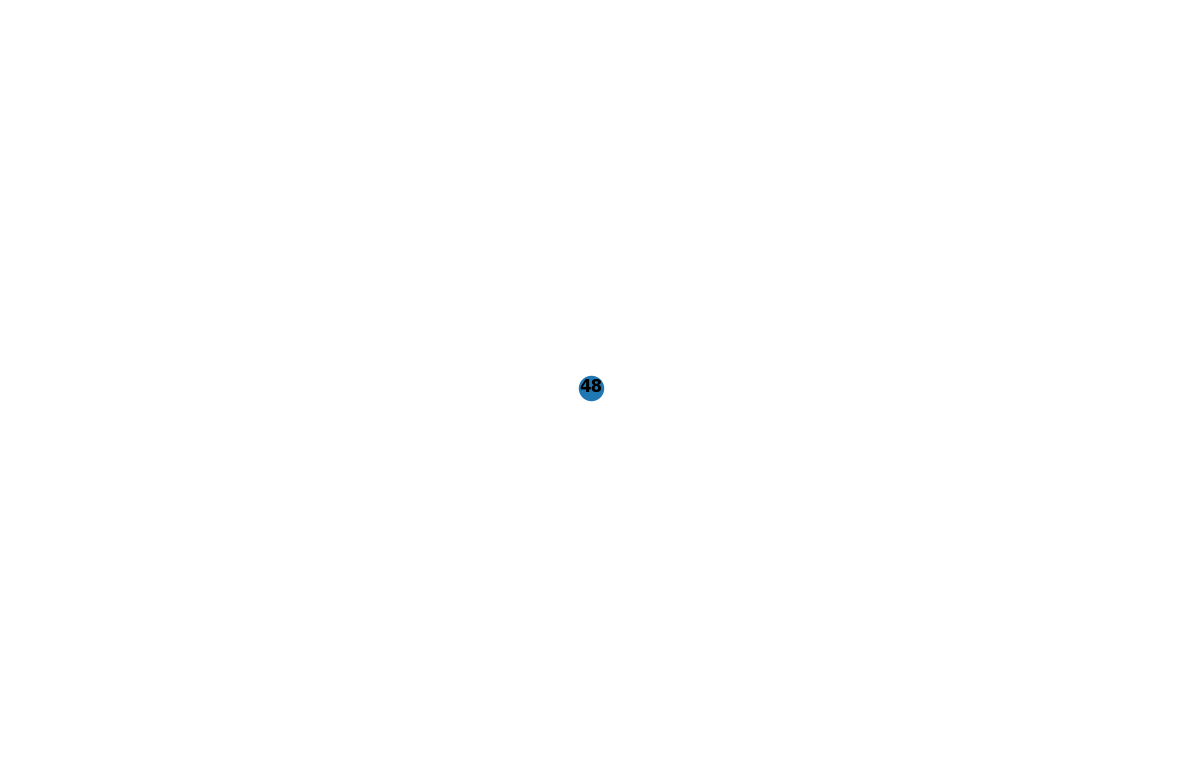

In [12]:
draw_graph(graph.subgraph(connected_components[1]))

# BFS

In [25]:
random_start = np.random.choice(graph.nodes)
random_target = np.random.choice(graph.nodes)
print(random_start, random_target)
paths = nx.algorithms.shortest_paths.unweighted.single_source_shortest_path(graph, random_start)
print(f"Shortest path between {random_start} and {random_target} is {paths[random_target]} with {len(paths[random_target])} steps.")

61 56
Shortest path between 61 and 56 is [61, 80, 99, 59, 63, 60, 9, 56] with 8 steps.


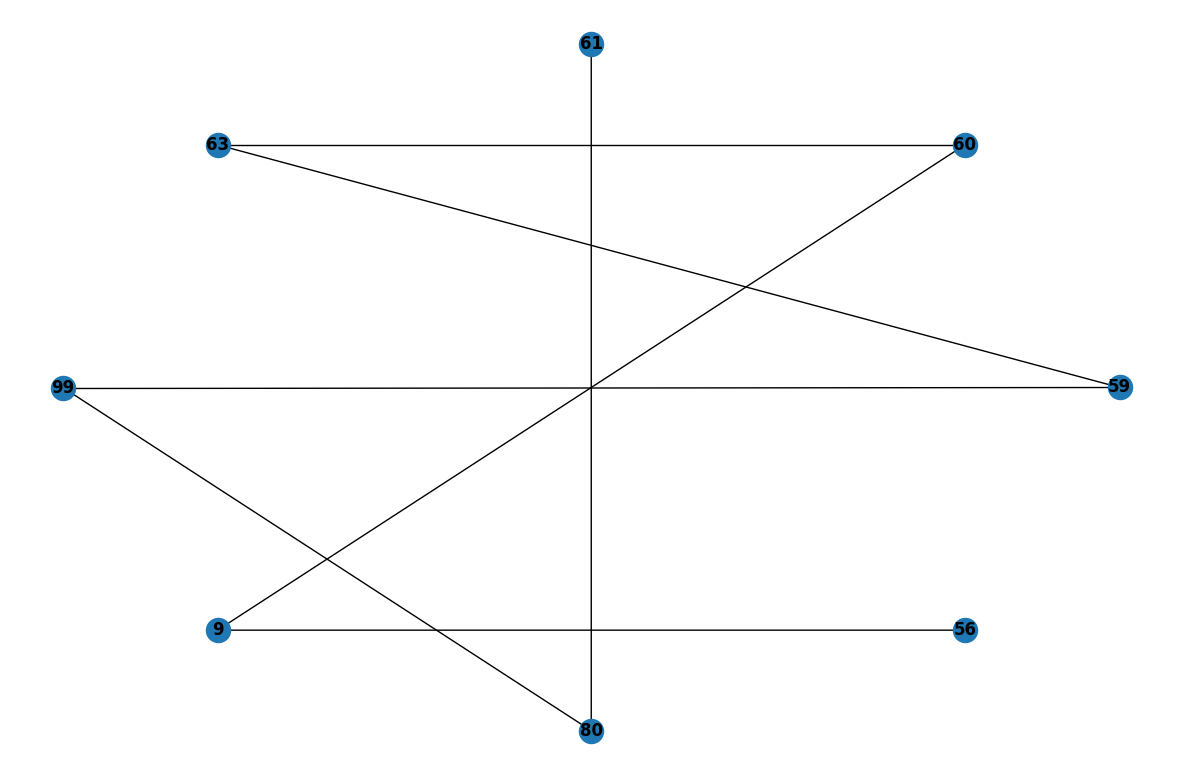

In [26]:
draw_graph(graph.subgraph(paths[random_target]))